<a href="https://colab.research.google.com/github/snowymo/Colabs/blob/main/GenerateDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm

     |████████████████████████████████| 376 kB 12.5 MB/s 


In [ ]:
import cv2
import torch
import urllib.request
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
url, filename = ("https://duruofei.com/images/RuofeiDu.jpg", "RuofeiDu.jpg")
urllib.request.urlretrieve(url, filename)

('RuofeiDu.jpg', <http.client.HTTPMessage at 0x7ff5dd7cdd10>)

Load large or small model

In [ ]:
use_large_model = True

if use_large_model:
    midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")
else:
    midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")

Downloading: "https://github.com/intel-isl/MiDaS/archive/master.zip" to /root/.cache/torch/hub/master.zip


Loading weights:  None


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/intel-isl/MiDaS/releases/download/v2_1/model-small-70d6b9c8.pt" to /root/.cache/torch/hub/checkpoints/model-small-70d6b9c8.pt


  0%|          | 0.00/81.8M [00:00<?, ?B/s]

Move model to GPU if available

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas = midas.eval()

Load transforms to resize and normalize the image for large or small model

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if use_large_model:
    transform = midas_transforms.default_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Load image and apply transforms

In [ ]:
filename = 'RuofeiDu.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img).to(device)

Predict and resize to original resolution

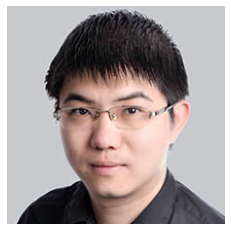

In [ ]:
plt.imshow(img); plt.axis('off'); plt.show()

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
output = prediction.cpu().numpy()

Show result

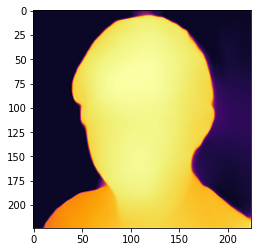

In [ ]:
plt.imshow(output, cmap='inferno', vmin=output.min(), vmax=output.max()); plt.axis('on'); plt.show()

In [ ]:
# save depth as image

subject = "Ruofei"
out_name = f'{subject}_depth.jpg'
plt.imsave(out_name, output, cmap='gray', vmin=c_output.min(), vmax=c_output.max())

In [ ]:
# save depth as numpy array

out_name = f'{subject}_depth.npy'
np.save(out_name, output)